### Importing Libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max.columns",None)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.api import add_constant,OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Reading Data set

In [132]:
bikedata = pd.read_csv("day.csv")
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Analyzing the dataset 

#### Checking for null values if any in the column

In [133]:
bikedata.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [134]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Since we dont have null values in any of the column we are good to go

#### Mapping the encoded values to variables for analysis purpose as mentioned in the dictionary

In [135]:
## Mapping Season column
seasonMapper ={
    1:'spring', 
    2:'summer', 
    3:'fall', 
    4:'winter'
}

bikedata.season = bikedata.season.map(lambda x:seasonMapper.get(x))
bikedata.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [136]:
## Mapping Yr column
yrMapper ={
    0: 2018,
    1:2019
}

bikedata.yr = bikedata.yr.map(lambda x : yrMapper.get(x))
bikedata.yr.value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [137]:
## mapping mnth column
mnthMapper ={
    1:"Jan",
    2:"Feb",
    3:"Mar",
    4:"Apr",
    5:"May",
    6:"Jun",
    7:"Jul",
    8:"Aug",
    9:"Sep",
    10:"Oct",
    11:"Nov",
    12:"Dec"
}
bikedata.mnth = bikedata.mnth.map(lambda x : mnthMapper.get(x))
bikedata.mnth.value_counts()


Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [138]:

## Mapping holiday column
holidayMapper ={
    0: 'No',
    1: 'Yes'
}

bikedata.holiday = bikedata.holiday.map(lambda x : holidayMapper.get(x))

bikedata.holiday.value_counts()

No     709
Yes     21
Name: holiday, dtype: int64

In [139]:
## mapping week column
weekMapper ={
    0:"Sun",
    1:"Mon",
    2:"Tue",
    3:"Wed",
    4:"Thu",
    5:"Fri",
    6:"Sat"
}
bikedata.weekday = bikedata.weekday.map(lambda x : weekMapper.get(x))
bikedata.weekday.value_counts()

Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64

In [140]:
## Mapping workingday column
workingdayMapper ={
    0: 'No',
    1: 'Yes'
}

bikedata.workingday = bikedata.workingday.map(lambda x : workingdayMapper.get(x))
bikedata.workingday.value_counts()

Yes    499
No     231
Name: workingday, dtype: int64

In [141]:
## Mapping weathersit column
weathersitMapper ={
    1: 'Clear',
    2: 'Cloudy',
    3:'Light Rain',
    4:'Heavy Rain'
}

bikedata.weathersit = bikedata.weathersit.map(lambda x : weathersitMapper.get(x))
bikedata.weathersit.value_counts()

Clear         463
Cloudy        246
Light Rain     21
Name: weathersit, dtype: int64

### data Cleaning


#### We can drop record which has duplicate values 

In [142]:
bikedata.drop_duplicates(inplace=True)
bikedata.shape

(730, 16)

####  Finding all the column in the dataset

In [143]:
bikedata.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### We can drop instant column as it is used only for record index,which does not affect any of our analysis

In [144]:
(bikedata.instant.value_counts()>1).sum()

0

In [145]:
bikedata.drop("instant",axis=1,inplace=True)
bikedata.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

#### We can drop dteday  as we have already extracted the day,year and month from it.

In [146]:
year = pd.DatetimeIndex(bikedata.dteday).year
year.value_counts()




2018    365
2019    365
Name: dteday, dtype: int64

In [147]:
bikedata.drop("dteday",axis=1,inplace=True)
bikedata.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

## visualizing  the bike data set

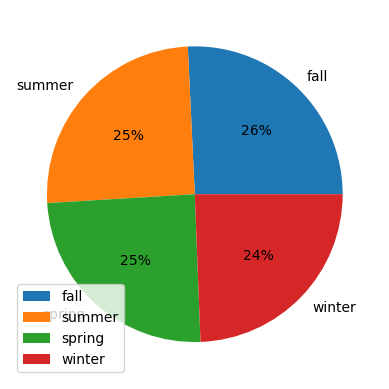

In [148]:
seasondata = bikedata.season.value_counts()
plt.pie(seasondata,labels=seasondata.keys(),autopct='%.0f%%')
plt.legend()
plt.show()

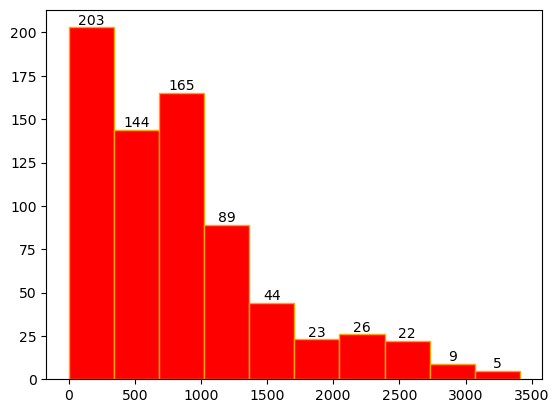

In [149]:
counts, edges, bars= plt.hist(bikedata.casual,bins=10,edgecolor='Orange',color='red')
plt.bar_label(bars)
plt.show()

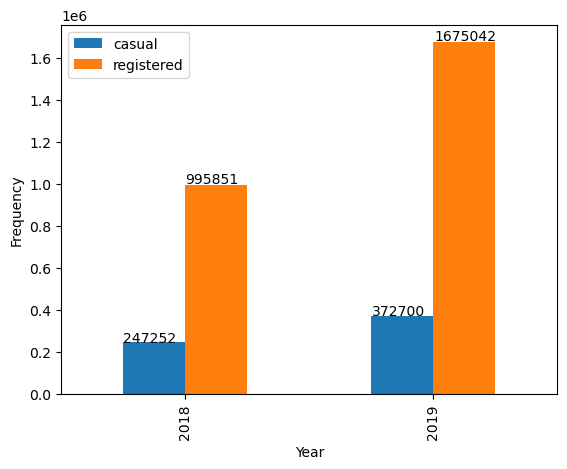

In [150]:
test = bikedata.groupby(by='yr')['casual','registered'].sum()

ax = test.plot.bar()

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()


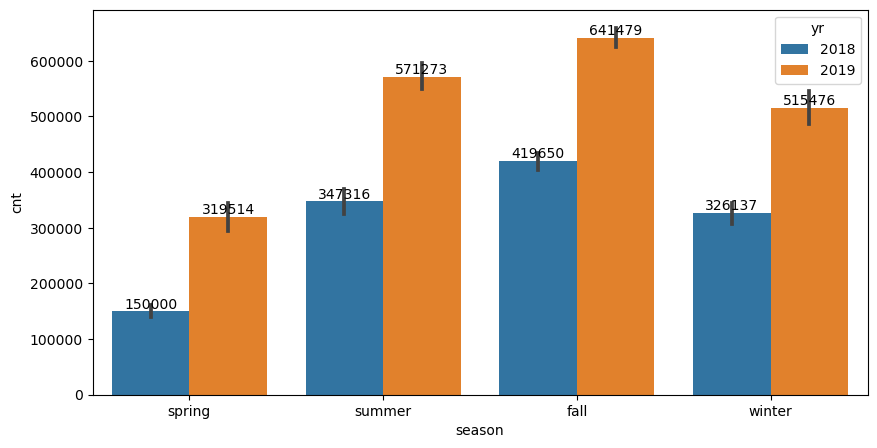

In [151]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data = bikedata,x='season',y='cnt',hue='yr',estimator=np.sum)

for container in ax.containers:
    plt.bar_label(container)

plt.show()

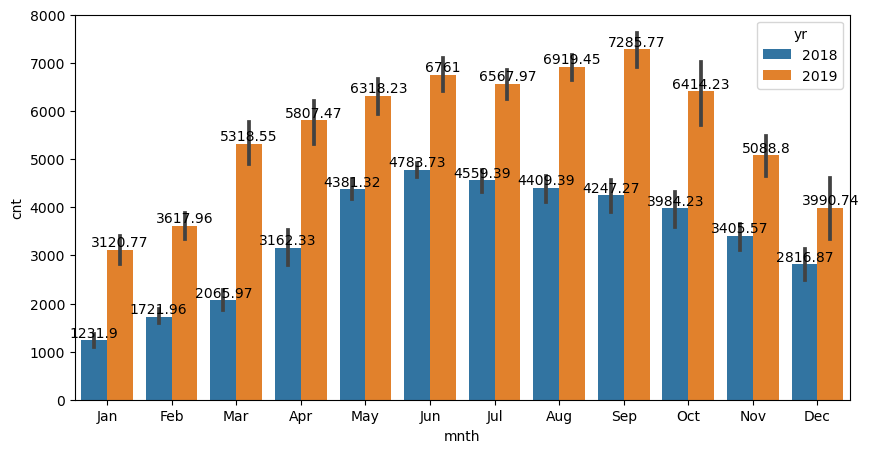

In [152]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data = bikedata,x='mnth',y='cnt',hue='yr',estimator=np.mean)

for container in ax.containers:
    plt.bar_label(container)

plt.show()

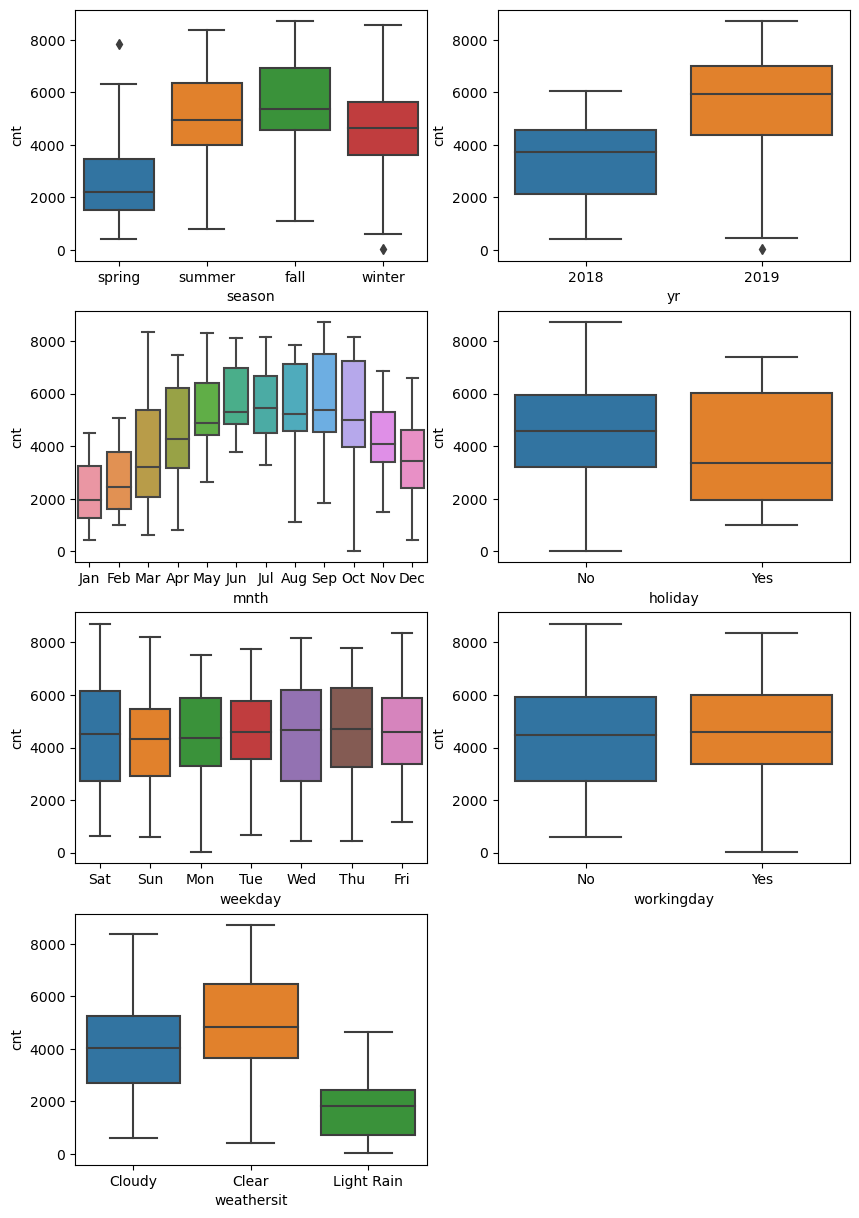

In [153]:
categorical_features = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

plt.figure(figsize=(10,15))
for i in range(len(categorical_features)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=categorical_features[i],y='cnt',data=bikedata)

plt.show()



In [154]:
bikedata.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

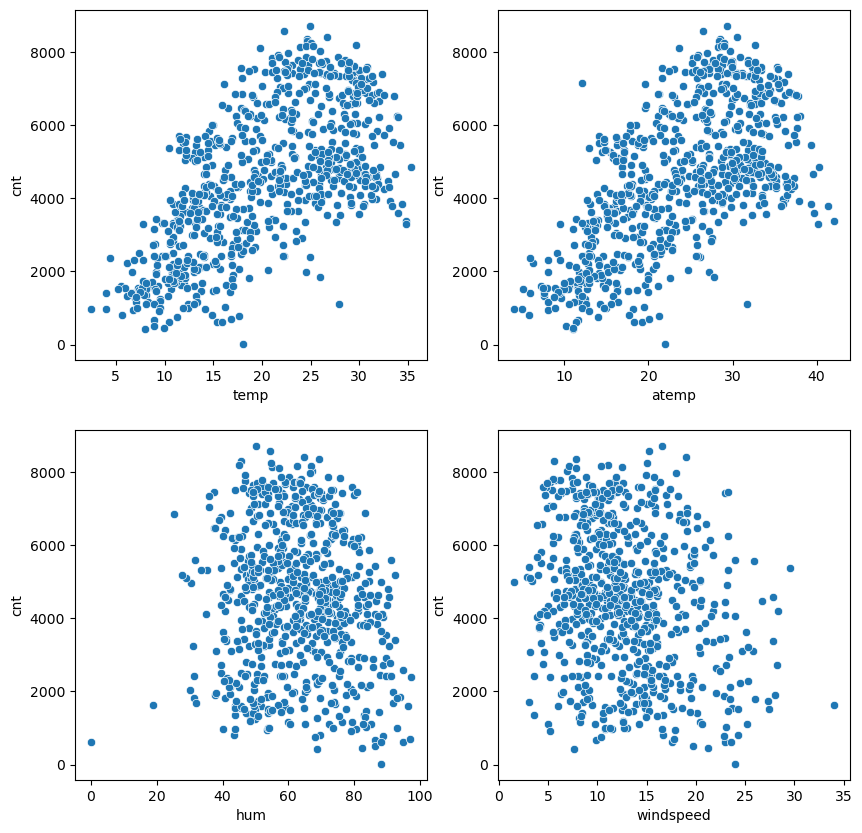

In [155]:
discrete_features = ['temp','atemp','hum','windspeed']
plt.figure(figsize=(10,10))
for i in range(len(discrete_features)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=discrete_features[i],y='cnt',data = bikedata)
plt.show()

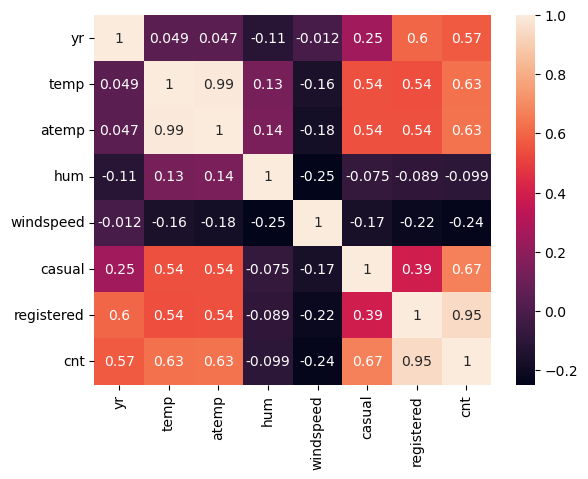

In [156]:
data_corr = bikedata.corr()
sns.heatmap(data_corr,annot=True)
plt.show()

## Model Creation

##### From the EDA we found  that the  target variable i.e. cnt is dependent on multiple feature like temp,season,weekday hence we need to perform multiple linear regression
##### We will be following the hybrid model where we will use RFE(Recursive feature analysis) and then do manual selection of feature on top of it.

### Resetting all the values of data set to its original form

In [157]:

bikedata.describe()

,yr,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.500343,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2018.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2018.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,2018.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,2019.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,2019.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [158]:
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,No,Sat,No,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,No,Sun,No,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,No,Mon,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,No,Tue,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,No,Wed,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Since our target variable is cnt which is sum of causal and registered user .We can drop causal and registered column since we are building a model which will be apllied on the all type of user i.e. cnt column

In [159]:
bikedata.drop(['casual','registered'],axis=1,inplace=True)

 - ### mapping back yr column with below encoding:
      -  2018 -> 0
      -  2019 -> 1

In [160]:
yrmapper = {
    2018:0,
    2019:1
}

bikedata.yr = bikedata.yr.map(lambda x: yrmapper.get(x))

bikedata.yr.value_counts()


0    365
1    365
Name: yr, dtype: int64

 - ### mapping back holiday,workingday, column with below encoding:
      -  No -> 0
      -  Yes -> 1

In [161]:

## Mapping  column
binaryMapper ={
    'No':0,
    'Yes':1
}

feature_with_yes_no_values = ['holiday','workingday']

bikedata[feature_with_yes_no_values] = bikedata[feature_with_yes_no_values].apply(lambda x : x.map(binaryMapper),axis=1)



In [162]:
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### getting the dummy columns for all the categorical columns ['season','mnth','weekday','weathersit']

In [163]:


### getting dummies column for categorical variable

season_encoded = pd.get_dummies(bikedata.season,drop_first=True)
weekday_encoded = pd.get_dummies(bikedata.weekday,drop_first=True)
weathersit_encoded = pd.get_dummies(bikedata.weathersit,drop_first=True)
mnth_encoded = pd.get_dummies(bikedata.mnth,drop_first=True)




#### Season is encoded in below code 
     ### 100 -> spring
     ### 010-> summer
     ### 001 -> winter
     ### 000 -> fall
        
#### weekday is encoded in below code 
     ### 010000 -> sat
     ### 001000-> sun
     ### 100000 -> mon etc
    

### concating  all the dummies column in dataset

In [164]:
bikedata = pd.concat([bikedata,season_encoded,weekday_encoded,weathersit_encoded,mnth_encoded],axis=1)
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


#### now dropping the original categorical column since we have already got the dummy column

In [165]:
categorical_columns =  ['season','mnth','weekday','weathersit']

bikedata.drop(categorical_columns,axis=1,inplace=True)

In [166]:
bikedata.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


### Now we are done with the conversion of all the binary and categorical column we can go ahead and  split our data into training and testing set,we will be using 70% of data for training purpose and 30% of the data for Testing purpose

In [167]:
### dividing dataset into traing and testing data using sklearn train_test_split method

df_train,df_test = train_test_split(bikedata,train_size=0.7,random_state=100)



In [168]:
print(df_train.shape,df_test.shape)

(510, 30) (220, 30)


## Rescaling training data using MinMaxScaler which uses below formula 
### (x-xmin)/(xmax-xmin) ,when x = xmin its value is 0 and  when  x = xmax its value is 1
   

In [169]:
## creating instance of  minmaxscaler class
scaler = MinMaxScaler()

##feature to be used for rescalling 
feature_for_scaling = ['temp','atemp','hum','windspeed','cnt']

df_train[feature_for_scaling] = scaler.fit_transform(df_train[feature_for_scaling])



In [170]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Now we can process our data for model fitting

In [171]:
### separating target(y) and input variable (X)
y_train = df_train.pop('cnt')
X_train = df_train

### fetaure selection based on the RFE algorithm

In [172]:
## creating instance of linear regression class imported from sklearn.linear_model module

lm = LinearRegression()
lm.fit(X=X_train,y=y_train)

## instantiating RFE class imported from sklearn.feature_selection module

rfe = RFE(lm,n_features_to_select=25) ## selecting top 25 feature  out of 30 
rfe = rfe.fit(X_train,y_train)




In [173]:
rfe_analyzed_data=list(zip(X_train.columns,rfe.support_,rfe.ranking_))
rfe_analyzed_data.sort(key=lambda x:x[2])

In [174]:
rfe_analyzed_data

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', True, 1),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', True, 1),
 ('Tue', True, 1),
 ('Cloudy', True, 1),
 ('Light Rain', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Sep', True, 1),
 ('Wed', False, 2),
 ('Oct', False, 3),
 ('Jun', False, 4),
 ('Mar', False, 5)]

In [175]:
rfe_selected_columns = X_train.columns[rfe.support_]

In [176]:
### filtering out feature based on rfe selection
X_train_rfe = X_train[rfe_selected_columns]

## Now we have our selected feature and also our target variable ,we will be analyzing on the RFE selected feature

In [177]:
## adding constant in X variable for our OLS model to work
X_train_rfe = add_constant(X_train_rfe)

## creating instance of OLS class imported from statsmodel.api module
sm_lm = OLS(y_train,X_train_rfe).fit()

## analysing the summary of sm_lm
sm_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.52e-184
Time:                        21:01:58   Log-Likelihood:                 527.00
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.601      0.000       0.182       0.308
yr             0.2323      0.008     29.032      0.000       0.217       0.248
holiday        0.0099      0.023      0.423      0.672      -0.036       0.056
workingday     0.0949      0.011      8.853      0.000       0.074       0.116
temp           0.3987      0.135      2.952      0.003       0.133       0.664
atemp          0.0523      0.136      0.383      0.702      -0.216       0.320
hum           -0.1526      0.038     -4.036      0.000      -0.227      -0.078
windspeed     -0.1842      0.026     -7.091      0.000      -0.235      -0.133
spring        -0.0475      0.027     -1.777      0.076      -0.100       0.005
summer         0.0391      0.023      1.672      0.095      -0.007       0.085
winter         0.1087      0.023      4.762      0.000       0.064       0.153
Mon           -0.0183      0.013     -1.415      0.158      -0.044       0.007
Sat            0.0972      0.013      7.639      0.000       0.072       0.122
Sun            0.0430      0.013      3.295      0.001       0.017       0.069
Thu           -0.0064      0.013     -0.492      0.623      -0.032       0.019
Tue           -0.0152      0.013     -1.162      0.246      -0.041       0.011
Cloudy        -0.0592      0.010     -5.717      0.000      -0.080      -0.039
Light Rain    -0.2556      0.026     -9.719      0.000      -0.307      -0.204
Aug            0.0158      0.024      0.665      0.506      -0.031       0.062
Dec           -0.0490      0.018     -2.690      0.007      -0.085      -0.013
Feb           -0.0343      0.021     -1.600      0.110      -0.076       0.008
Jan           -0.0649      0.021     -3.053      0.002      -0.107      -0.023
Jul           -0.0392      0.025     -1.589      0.113      -0.088       0.009
May            0.0229      0.017      1.322      0.187      -0.011       0.057
Nov           -0.0462      0.019     -2.444      0.015      -0.083      -0.009
Sep            0.0803      0.021      3.742      0.000       0.038       0.122
==============================================================================
Omnibus:                       82.771   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.939
Skew:                          -0.793   Prob(JB):                     5.26e-50
Kurtosis:                       5.857   Cond. No.                     7.21e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.27e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### analysing VIF(Variance Inflation Factor)

In [178]:
def calculate_vif():
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X_train_rfe.columns
    vif_data['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
    vif_data['VIF'] = round(vif_data['VIF'],2)
    return vif_data
    
    

In [179]:
calculate_vif().sort_values(by='VIF',ascending=False)

,Feature,VIF
13,Sun,inf
12,Sat,inf
2,holiday,inf
3,workingday,inf
4,temp,60.77
5,atemp,54.77
8,spring,8.60
9,summer,6.66
10,winter,6.34
18,Aug,3.19


## We can drop column based on the Pvalue and VIF using below intuition:
    
   Case 1:
        high p value and high vif - definitely drop this column
   
   Case 2:
        high p value and low vif - drop column with high p value
        
   Case 3:
        low p value and high vif - try to do 2 steps vif will change and then again analyze
        
   Case 4:
        low p value and low vif - no need to drop column as it will not create any issue


In [180]:
### according to our rule we see that 
## atemp has pvalue value of 0.702 very high in comparison with significance value i.e(0.050) 
### workingday,sun etc has high vif so according to our rule we will drop atemp and follow the same process again


### dropping atemp feature

In [181]:

X_train_rfe.drop('atemp',axis=1 ,inplace=True)

## creating instance of OLS class imported from statsmodel.api module
sm_lm = OLS(y_train,X_train_rfe).fit()

## analysing the summary of sm_lm
sm_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.42e-185
Time:                        21:02:02   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2447      0.032      7.601      0.000       0.181       0.308
yr             0.2322      0.008     29.055      0.000       0.217       0.248
holiday        0.0092      0.023      0.398      0.691      -0.036       0.055
workingday     0.0949      0.011      8.858      0.000       0.074       0.116
temp           0.4483      0.038     11.674      0.000       0.373       0.524
hum           -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed     -0.1862      0.025     -7.319      0.000      -0.236      -0.136
spring        -0.0467      0.027     -1.755      0.080      -0.099       0.006
summer         0.0399      0.023      1.716      0.087      -0.006       0.086
winter         0.1095      0.023      4.830      0.000       0.065       0.154
Mon           -0.0179      0.013     -1.389      0.165      -0.043       0.007
Sat            0.0974      0.013      7.663      0.000       0.072       0.122
Sun            0.0432      0.013      3.313      0.001       0.018       0.069
Thu           -0.0061      0.013     -0.467      0.640      -0.032       0.020
Tue           -0.0150      0.013     -1.145      0.253      -0.041       0.011
Cloudy        -0.0593      0.010     -5.730      0.000      -0.080      -0.039
Light Rain    -0.2563      0.026     -9.782      0.000      -0.308      -0.205
Aug            0.0151      0.024      0.638      0.524      -0.031       0.061
Dec           -0.0489      0.018     -2.689      0.007      -0.085      -0.013
Feb           -0.0344      0.021     -1.603      0.110      -0.076       0.008
Jan           -0.0651      0.021     -3.067      0.002      -0.107      -0.023
Jul           -0.0392      0.025     -1.591      0.112      -0.088       0.009
May            0.0227      0.017      1.311      0.191      -0.011       0.057
Nov           -0.0462      0.019     -2.443      0.015      -0.083      -0.009
Sep            0.0803      0.021      3.746      0.000       0.038       0.122
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.232
Skew:                          -0.788   Prob(JB):                     1.23e-49
Kurtosis:                       5.849   Cond. No.                     6.87e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.31e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [182]:
calculate_vif().sort_values(by='VIF',ascending=False)

,Feature,VIF
12,Sun,inf
11,Sat,inf
2,holiday,inf
3,workingday,inf
7,spring,8.55
8,summer,6.60
9,winter,6.27
4,temp,4.92
17,Aug,3.17
21,Jul,2.81


### dropping holiday feature based on our rule

In [183]:

X_train_rfe.drop('holiday',axis=1 ,inplace=True)

## creating instance of OLS class imported from statsmodel.api module
sm_lm = OLS(y_train,X_train_rfe).fit()

## analysing the summary of sm_lm
sm_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.42e-185
Time:                        21:02:04   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2539      0.048      5.250      0.000       0.159       0.349
yr             0.2322      0.008     29.055      0.000       0.217       0.248
workingday     0.0856      0.026      3.248      0.001       0.034       0.137
temp           0.4483      0.038     11.674      0.000       0.373       0.524
hum           -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed     -0.1862      0.025     -7.319      0.000      -0.236      -0.136
spring        -0.0467      0.027     -1.755      0.080      -0.099       0.006
summer         0.0399      0.023      1.716      0.087      -0.006       0.086
winter         0.1095      0.023      4.830      0.000       0.065       0.154
Mon           -0.0179      0.013     -1.389      0.165      -0.043       0.007
Sat            0.0881      0.029      3.043      0.002       0.031       0.145
Sun            0.0339      0.029      1.168      0.244      -0.023       0.091
Thu           -0.0061      0.013     -0.467      0.640      -0.032       0.020
Tue           -0.0150      0.013     -1.145      0.253      -0.041       0.011
Cloudy        -0.0593      0.010     -5.730      0.000      -0.080      -0.039
Light Rain    -0.2563      0.026     -9.782      0.000      -0.308      -0.205
Aug            0.0151      0.024      0.638      0.524      -0.031       0.061
Dec           -0.0489      0.018     -2.689      0.007      -0.085      -0.013
Feb           -0.0344      0.021     -1.603      0.110      -0.076       0.008
Jan           -0.0651      0.021     -3.067      0.002      -0.107      -0.023
Jul           -0.0392      0.025     -1.591      0.112      -0.088       0.009
May            0.0227      0.017      1.311      0.191      -0.011       0.057
Nov           -0.0462      0.019     -2.443      0.015      -0.083      -0.009
Sep            0.0803      0.021      3.746      0.000       0.038       0.122
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.232
Skew:                          -0.788   Prob(JB):                     1.23e-49
Kurtosis:                       5.849   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
calculate_vif().sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,153.33
2,workingday,9.97
6,spring,8.55
10,Sat,7.20
11,Sun,6.79
7,summer,6.60
8,winter,6.27
3,temp,4.92
16,Aug,3.17
20,Jul,2.81


### dropping Thu feature based on our rule

In [185]:
X_train_rfe.drop('Thu',axis=1 ,inplace=True)

## creating instance of OLS class imported from statsmodel.api module
sm_lm = OLS(y_train,X_train_rfe).fit()

## analysing the summary of sm_lm
sm_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.36e-186
Time:                        21:02:06   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2512      0.048      5.235      0.000       0.157       0.345
yr             0.2322      0.008     29.077      0.000       0.217       0.248
workingday     0.0861      0.026      3.269      0.001       0.034       0.138
temp           0.4484      0.038     11.686      0.000       0.373       0.524
hum           -0.1516      0.038     -4.024      0.000      -0.226      -0.078
windspeed     -0.1863      0.025     -7.327      0.000      -0.236      -0.136
spring        -0.0466      0.027     -1.753      0.080      -0.099       0.006
summer         0.0401      0.023      1.726      0.085      -0.006       0.086
winter         0.1099      0.023      4.851      0.000       0.065       0.154
Mon           -0.0160      0.012     -1.310      0.191      -0.040       0.008
Sat            0.0905      0.028      3.175      0.002       0.034       0.146
Sun            0.0363      0.029      1.268      0.205      -0.020       0.092
Tue           -0.0131      0.012     -1.052      0.293      -0.037       0.011
Cloudy        -0.0591      0.010     -5.719      0.000      -0.079      -0.039
Light Rain    -0.2565      0.026     -9.797      0.000      -0.308      -0.205
Aug            0.0152      0.024      0.645      0.520      -0.031       0.062
Dec           -0.0492      0.018     -2.709      0.007      -0.085      -0.014
Feb           -0.0340      0.021     -1.590      0.112      -0.076       0.008
Jan           -0.0650      0.021     -3.066      0.002      -0.107      -0.023
Jul           -0.0389      0.025     -1.583      0.114      -0.087       0.009
May            0.0228      0.017      1.317      0.188      -0.011       0.057
Nov           -0.0466      0.019     -2.472      0.014      -0.084      -0.010
Sep            0.0803      0.021      3.747      0.000       0.038       0.122
==============================================================================
Omnibus:                       82.702   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.333
Skew:                          -0.792   Prob(JB):                     4.32e-50
Kurtosis:                       5.862   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
calculate_vif().sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,151.15
2,workingday,9.96
6,spring,8.55
10,Sat,6.98
7,summer,6.60
11,Sun,6.59
8,winter,6.27
3,temp,4.92
15,Aug,3.17
19,Jul,2.81


###  dropping Aug based on rule

In [187]:
X_train_rfe.drop('Aug',axis=1 ,inplace=True)

## creating instance of OLS class imported from statsmodel.api module
sm_lm = OLS(y_train,X_train_rfe).fit()

## analysing the summary of sm_lm
sm_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.47e-187
Time:                        21:02:07   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2594      0.046      5.611      0.000       0.169       0.350
yr             0.2324      0.008     29.128      0.000       0.217       0.248
workingday     0.0863      0.026      3.282      0.001       0.035       0.138
temp           0.4502      0.038     11.769      0.000       0.375       0.525
hum           -0.1505      0.038     -4.001      0.000      -0.224      -0.077
windspeed     -0.1864      0.025     -7.338      0.000      -0.236      -0.137
spring        -0.0564      0.022     -2.576      0.010      -0.099      -0.013
summer         0.0298      0.017      1.766      0.078      -0.003       0.063
winter         0.1009      0.018      5.663      0.000       0.066       0.136
Mon           -0.0160      0.012     -1.317      0.188      -0.040       0.008
Sat            0.0911      0.028      3.201      0.001       0.035       0.147
Sun            0.0364      0.029      1.275      0.203      -0.020       0.093
Tue           -0.0129      0.012     -1.040      0.299      -0.037       0.011
Cloudy        -0.0588      0.010     -5.703      0.000      -0.079      -0.039
Light Rain    -0.2573      0.026     -9.847      0.000      -0.309      -0.206
Dec           -0.0500      0.018     -2.758      0.006      -0.086      -0.014
Feb           -0.0340      0.021     -1.591      0.112      -0.076       0.008
Jan           -0.0650      0.021     -3.067      0.002      -0.107      -0.023
Jul           -0.0498      0.018     -2.770      0.006      -0.085      -0.014
May            0.0224      0.017      1.299      0.195      -0.012       0.056
Nov           -0.0476      0.019     -2.534      0.012      -0.085      -0.011
Sep            0.0716      0.017      4.303      0.000       0.039       0.104
==============================================================================
Omnibus:                       83.893   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.497
Skew:                          -0.803   Prob(JB):                     8.87e-51
Kurtosis:                       5.875   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
calculate_vif().sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,140.51
2,workingday,9.96
10,Sat,6.97
11,Sun,6.59
6,spring,5.79
3,temp,4.90
8,winter,3.88
7,summer,3.49
17,Jan,2.38
4,hum,1.97


In [189]:
### dropping tuesday

X_train_rfe.drop('Tue',axis=1 ,inplace=True)

## creating instance of OLS class imported from statsmodel.api module
sm_lm = OLS(y_train,X_train_rfe).fit()

## analysing the summary of sm_lm
sm_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.51e-188
Time:                        21:02:08   Log-Likelihood:                 526.03
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2580      0.046      5.582      0.000       0.167       0.349
yr             0.2323      0.008     29.122      0.000       0.217       0.248
workingday     0.0856      0.026      3.254      0.001       0.034       0.137
temp           0.4505      0.038     11.777      0.000       0.375       0.526
hum           -0.1518      0.038     -4.038      0.000      -0.226      -0.078
windspeed     -0.1869      0.025     -7.358      0.000      -0.237      -0.137
spring        -0.0562      0.022     -2.566      0.011      -0.099      -0.013
summer         0.0296      0.017      1.751      0.081      -0.004       0.063
winter         0.1004      0.018      5.639      0.000       0.065       0.135
Mon           -0.0130      0.012     -1.102      0.271      -0.036       0.010
Sat            0.0934      0.028      3.289      0.001       0.038       0.149
Sun            0.0389      0.029      1.364      0.173      -0.017       0.095
Cloudy        -0.0586      0.010     -5.683      0.000      -0.079      -0.038
Light Rain    -0.2557      0.026     -9.802      0.000      -0.307      -0.204
Dec           -0.0492      0.018     -2.718      0.007      -0.085      -0.014
Feb           -0.0350      0.021     -1.636      0.102      -0.077       0.007
Jan           -0.0649      0.021     -3.062      0.002      -0.107      -0.023
Jul           -0.0507      0.018     -2.825      0.005      -0.086      -0.015
May            0.0222      0.017      1.285      0.199      -0.012       0.056
Nov           -0.0475      0.019     -2.525      0.012      -0.084      -0.011
Sep            0.0718      0.017      4.314      0.000       0.039       0.104
==============================================================================
Omnibus:                       84.077   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.009
Skew:                          -0.797   Prob(JB):                     5.64e-52
Kurtosis:                       5.926   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
calculate_vif().sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,140.39
2,workingday,9.95
10,Sat,6.93
11,Sun,6.55
6,spring,5.79
3,temp,4.90
8,winter,3.88
7,summer,3.49
16,Jan,2.38
4,hum,1.97


In [191]:
## dropping Mon


X_train_rfe.drop('Mon',axis=1 ,inplace=True)

## creating instance of OLS class imported from statsmodel.api module
sm_lm = OLS(y_train,X_train_rfe).fit()

## analysing the summary of sm_lm
sm_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          5.20e-189
Time:                        21:02:09   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2478      0.045      5.472      0.000       0.159       0.337
yr             0.2318      0.008     29.103      0.000       0.216       0.247
workingday     0.0933      0.025      3.679      0.000       0.043       0.143
temp           0.4527      0.038     11.846      0.000       0.378       0.528
hum           -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed     -0.1873      0.025     -7.371      0.000      -0.237      -0.137
spring        -0.0553      0.022     -2.528      0.012      -0.098      -0.012
summer         0.0295      0.017      1.747      0.081      -0.004       0.063
winter         0.1001      0.018      5.618      0.000       0.065       0.135
Sat            0.1036      0.027      3.864      0.000       0.051       0.156
Sun            0.0492      0.027      1.827      0.068      -0.004       0.102
Cloudy        -0.0583      0.010     -5.655      0.000      -0.079      -0.038
Light Rain    -0.2549      0.026     -9.773      0.000      -0.306      -0.204
Dec           -0.0488      0.018     -2.692      0.007      -0.084      -0.013
Feb           -0.0348      0.021     -1.626      0.105      -0.077       0.007
Jan           -0.0650      0.021     -3.067      0.002      -0.107      -0.023
Jul           -0.0510      0.018     -2.844      0.005      -0.086      -0.016
May            0.0229      0.017      1.325      0.186      -0.011       0.057
Nov           -0.0461      0.019     -2.456      0.014      -0.083      -0.009
Sep            0.0723      0.017      4.349      0.000       0.040       0.105
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
calculate_vif().sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,134.74
2,workingday,9.24
9,Sat,6.18
10,Sun,5.84
6,spring,5.79
3,temp,4.88
8,winter,3.88
7,summer,3.49
15,Jan,2.38
4,hum,1.97


In [193]:
### droping may


X_train_rfe.drop('May',axis=1 ,inplace=True)

## creating instance of OLS class imported from statsmodel.api module
sm_lm = OLS(y_train,X_train_rfe).fit()

## analysing the summary of sm_lm
sm_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          9.80e-190
Time:                        21:02:10   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2368      0.045      5.315      0.000       0.149       0.324
yr             0.2312      0.008     29.052      0.000       0.216       0.247
workingday     0.0942      0.025      3.713      0.000       0.044       0.144
temp           0.4616      0.038     12.262      0.000       0.388       0.536
hum           -0.1477      0.037     -3.958      0.000      -0.221      -0.074
windspeed     -0.1889      0.025     -7.441      0.000      -0.239      -0.139
spring        -0.0515      0.022     -2.373      0.018      -0.094      -0.009
summer         0.0393      0.015      2.586      0.010       0.009       0.069
winter         0.1021      0.018      5.752      0.000       0.067       0.137
Sat            0.1040      0.027      3.875      0.000       0.051       0.157
Sun            0.0500      0.027      1.855      0.064      -0.003       0.103
Cloudy        -0.0585      0.010     -5.668      0.000      -0.079      -0.038
Light Rain    -0.2567      0.026     -9.849      0.000      -0.308      -0.206
Dec           -0.0474      0.018     -2.619      0.009      -0.083      -0.012
Feb           -0.0334      0.021     -1.562      0.119      -0.075       0.009
Jan           -0.0634      0.021     -2.991      0.003      -0.105      -0.022
Jul           -0.0515      0.018     -2.868      0.004      -0.087      -0.016
Nov           -0.0444      0.019     -2.371      0.018      -0.081      -0.008
Sep            0.0723      0.017      4.346      0.000       0.040       0.105
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.714
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
calculate_vif().sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,130.20
2,workingday,9.24
9,Sat,6.18
10,Sun,5.84
6,spring,5.69
3,temp,4.73
8,winter,3.85
7,summer,2.82
15,Jan,2.37
4,hum,1.94


In [195]:
### dropping feb column

X_train_rfe.drop('Feb',axis=1 ,inplace=True)

## creating instance of OLS class imported from statsmodel.api module
sm_lm = OLS(y_train,X_train_rfe).fit()

## analysing the summary of sm_lm
sm_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.52e-190
Time:                        21:02:13   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2235      0.044      5.103      0.000       0.137       0.310
yr             0.2309      0.008     28.978      0.000       0.215       0.247
workingday     0.0964      0.025      3.801      0.000       0.047       0.146
temp           0.4764      0.036     13.064      0.000       0.405       0.548
hum           -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed     -0.1879      0.025     -7.390      0.000      -0.238      -0.138
spring        -0.0607      0.021     -2.899      0.004      -0.102      -0.020
summer         0.0424      0.015      2.809      0.005       0.013       0.072
winter         0.1038      0.018      5.845      0.000       0.069       0.139
Sat            0.1068      0.027      3.984      0.000       0.054       0.160
Sun            0.0520      0.027      1.931      0.054      -0.001       0.105
Cloudy        -0.0583      0.010     -5.637      0.000      -0.079      -0.038
Light Rain    -0.2555      0.026     -9.791      0.000      -0.307      -0.204
Dec           -0.0388      0.017     -2.248      0.025      -0.073      -0.005
Jan           -0.0455      0.018     -2.548      0.011      -0.081      -0.010
Jul           -0.0524      0.018     -2.916      0.004      -0.088      -0.017
Nov           -0.0399      0.019     -2.152      0.032      -0.076      -0.003
Sep            0.0737      0.017      4.430      0.000       0.041       0.106
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
calculate_vif().sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,125.47
2,workingday,9.21
9,Sat,6.16
10,Sun,5.82
6,spring,5.27
3,temp,4.43
8,winter,3.83
7,summer,2.77
4,hum,1.94
16,Nov,1.77


In [197]:
## dropping sun
X_train_rfe.drop('Sun',axis=1 ,inplace=True)

## creating instance of OLS class imported from statsmodel.api module
sm_lm = OLS(y_train,X_train_rfe).fit()

## analysing the summary of sm_lm
sm_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.20e-190
Time:                        21:02:14   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2690      0.037      7.267      0.000       0.196       0.342
yr             0.2311      0.008     28.929      0.000       0.215       0.247
workingday     0.0521      0.011      4.826      0.000       0.031       0.073
temp           0.4744      0.037     12.978      0.000       0.403       0.546
hum           -0.1480      0.037     -3.952      0.000      -0.222      -0.074
windspeed     -0.1883      0.025     -7.386      0.000      -0.238      -0.138
spring        -0.0624      0.021     -2.974      0.003      -0.104      -0.021
summer         0.0421      0.015      2.783      0.006       0.012       0.072
winter         0.1038      0.018      5.832      0.000       0.069       0.139
Sat            0.0625      0.014      4.493      0.000       0.035       0.090
Cloudy        -0.0581      0.010     -5.607      0.000      -0.078      -0.038
Light Rain    -0.2552      0.026     -9.754      0.000      -0.307      -0.204
Dec           -0.0398      0.017     -2.302      0.022      -0.074      -0.006
Jan           -0.0465      0.018     -2.596      0.010      -0.082      -0.011
Jul           -0.0514      0.018     -2.854      0.004      -0.087      -0.016
Nov           -0.0441      0.018     -2.390      0.017      -0.080      -0.008
Sep            0.0714      0.017      4.289      0.000       0.039       0.104
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
calculate_vif().sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,89.13
6,spring,5.26
3,temp,4.42
8,winter,3.83
7,summer,2.77
4,hum,1.94
15,Nov,1.75
13,Jan,1.68
2,workingday,1.66
9,Sat,1.65


### Now we see that all the pvalues  of feature are less than significance value i.e alpha(0.05) and VIF for all the feature are less than 5 we are ok to keep the Feature remaining for our model

### Observation from our Training set :
   ##### R2 value is 0.849
   ##### Adjusted R2 value is 0.844
   ##### Prob (F-statistic): 	1.20e-190(very low means our fit is not by luck)
   ##### Durbin-Watson: 	2.030
   

In [199]:
### finding the correlation between the feature which got selected finally for our model prediction

all_features_for_model = final_columns_selected.append(pd.Index(['cnt']))

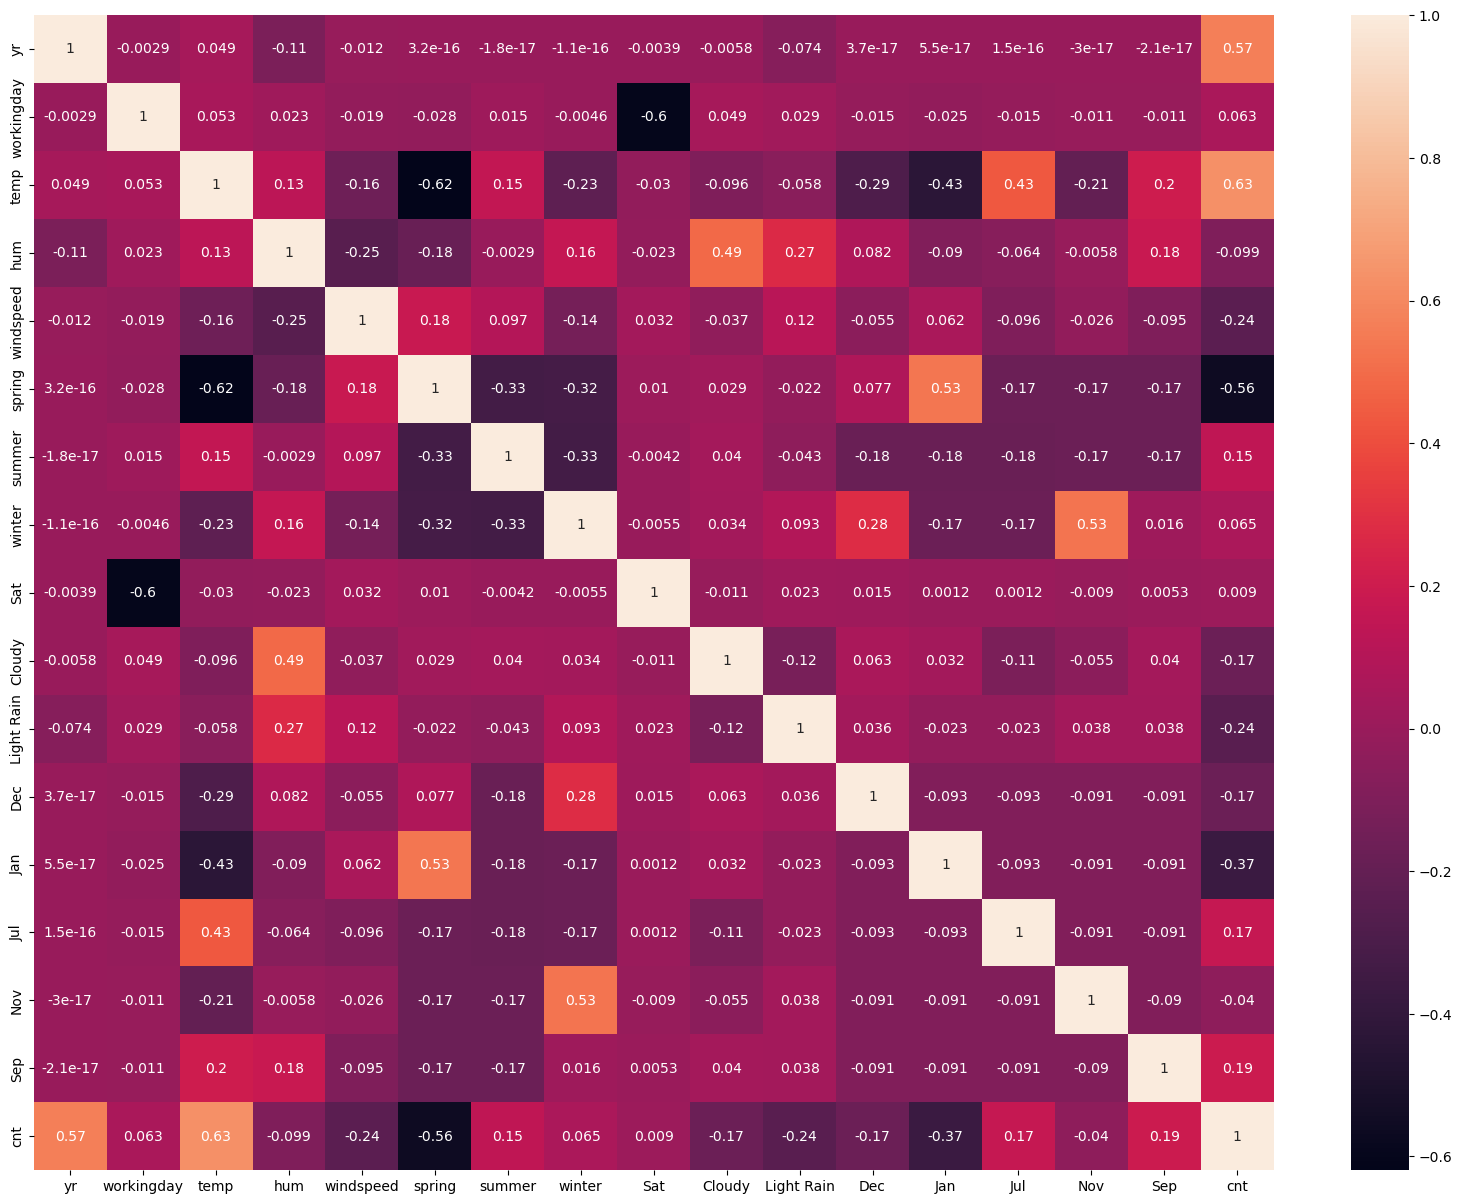

In [202]:
data_corr = bikedata[all_features_for_model].corr()
plt.figure(figsize=(20,15))
sns.heatmap(data_corr,annot=True)
plt.show()

In [203]:
## here in all_features_for_model we are including target variable as well to find the correlation
correlations = bikedata[all_features_for_model].corr()
target_correlation = correlations['cnt'].abs().sort_values(ascending=False)

In [204]:
## printing the feature which based on the correaltion with the target variable.
target_correlation

cnt           1.000000
temp          0.627044
yr            0.569728
spring        0.561702
Jan           0.367167
Light Rain    0.240602
windspeed     0.235132
Sep           0.194664
Dec           0.173878
Cloudy        0.170686
Jul           0.166236
summer        0.145325
hum           0.098543
winter        0.064619
workingday    0.062542
Nov           0.040344
Sat           0.009012
Name: cnt, dtype: float64

## Residual Analysis

In [205]:
y_train_predict = sm_lm.predict(X_train_rfe)

error_term = y_train - y_train_predict

### analysis of our assumption on the error term

In [206]:
final_columns_selected = X_train_rfe.columns.drop('const')

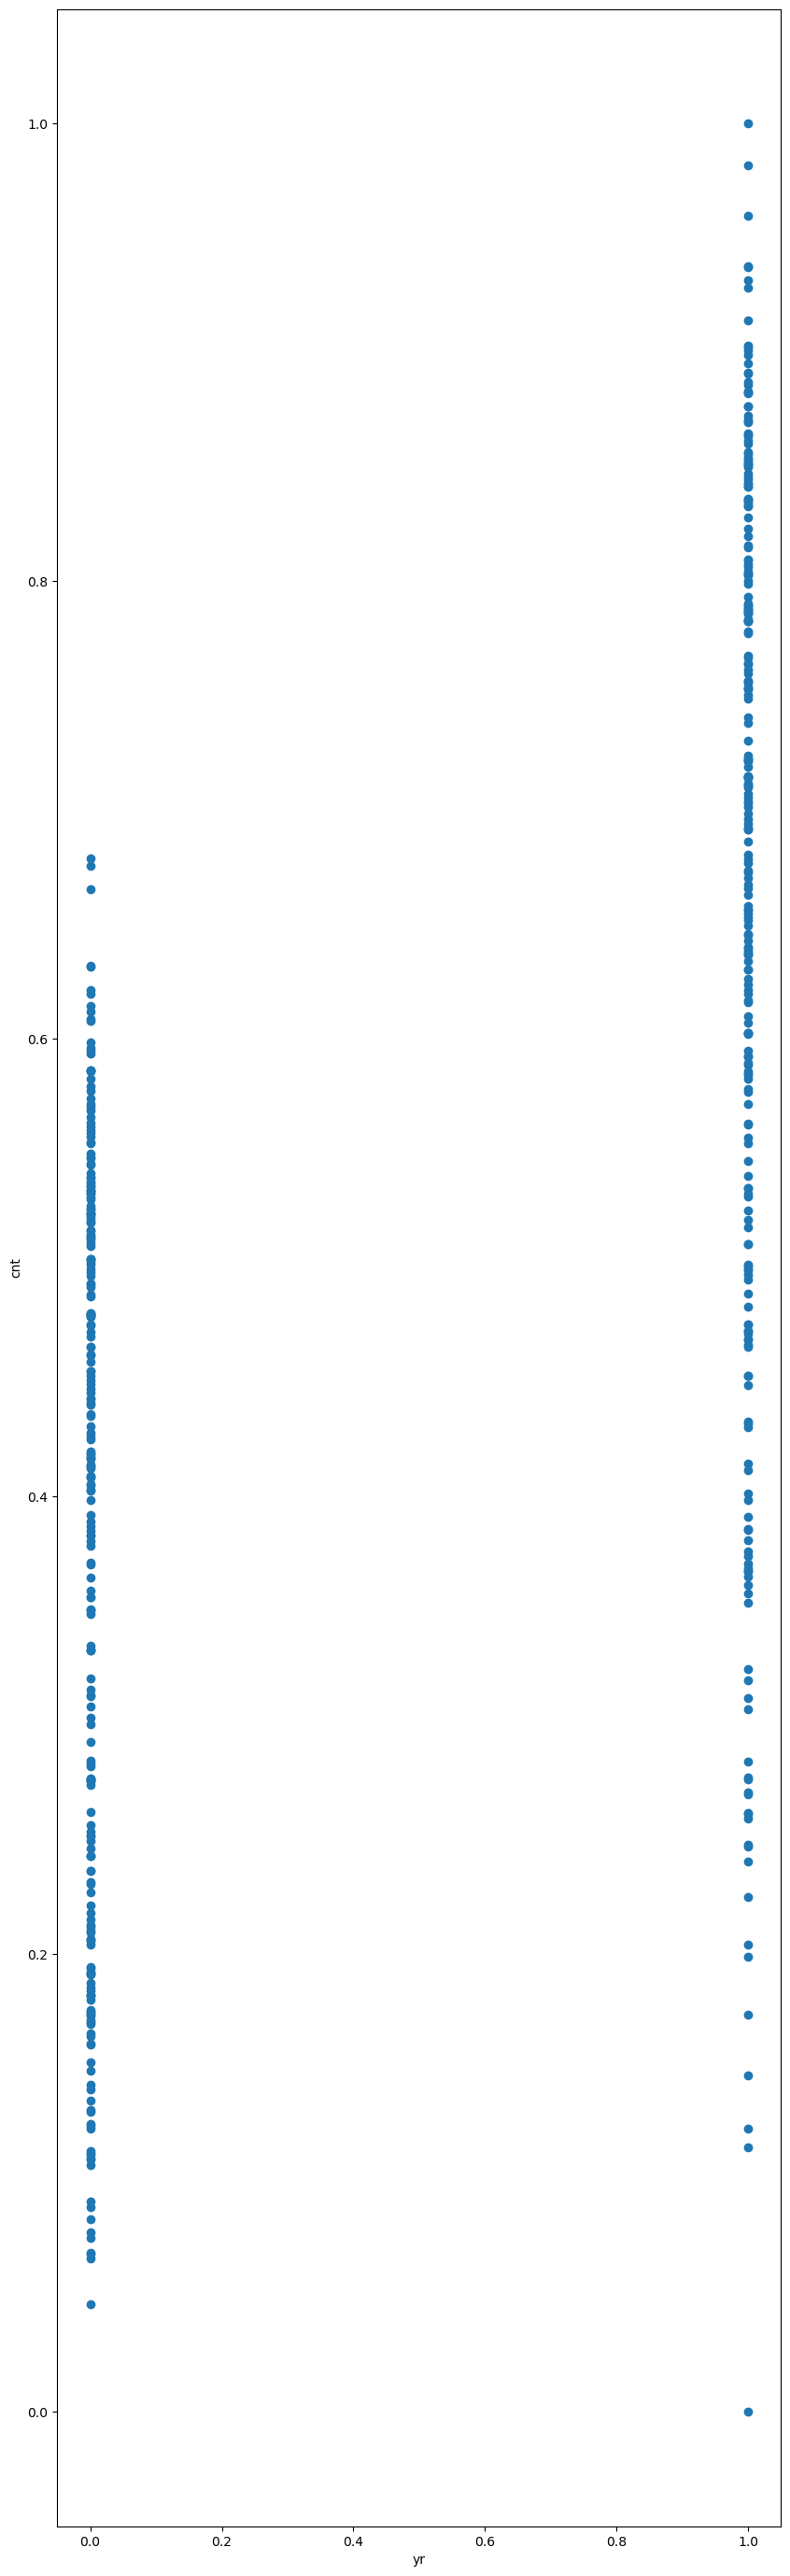

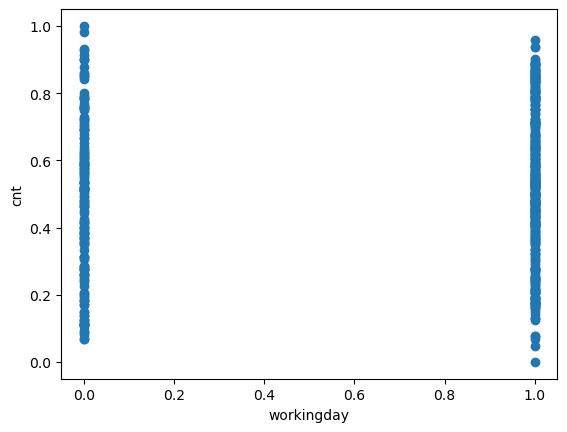

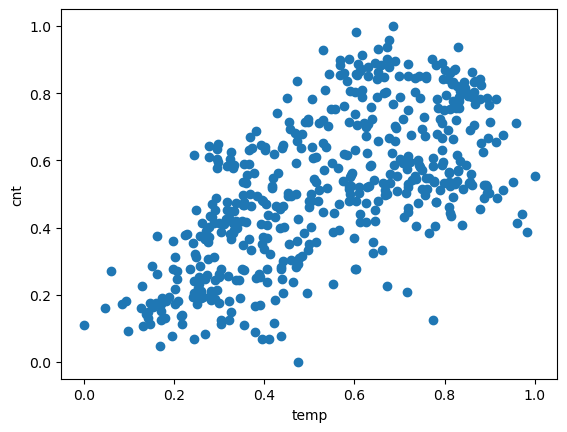

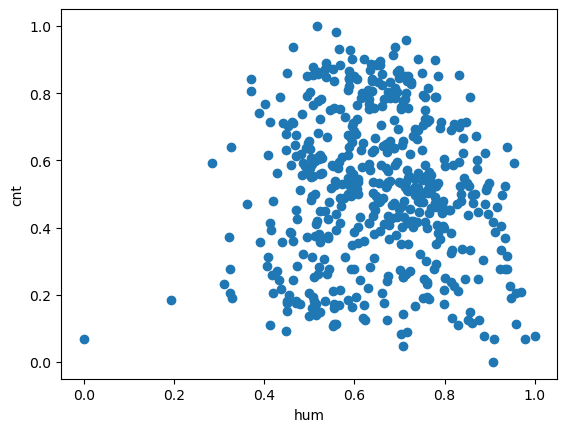

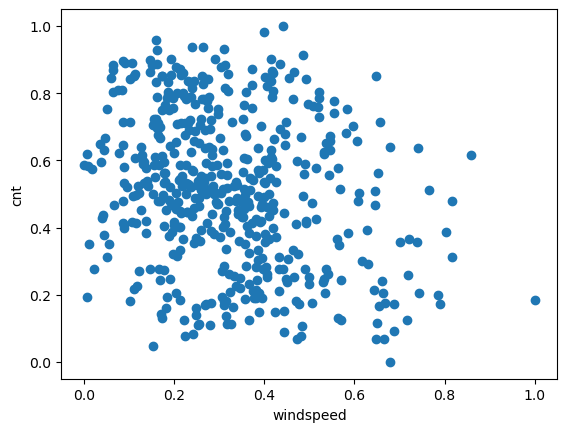

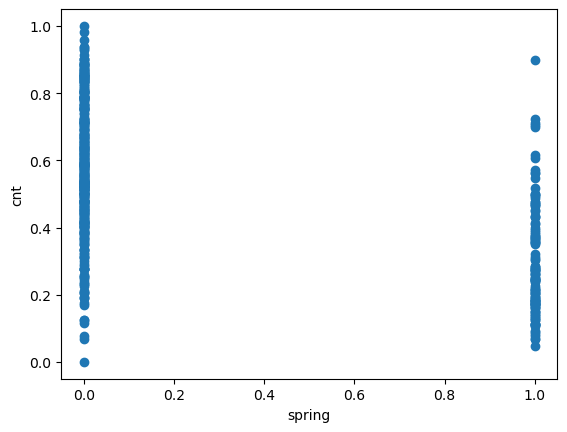

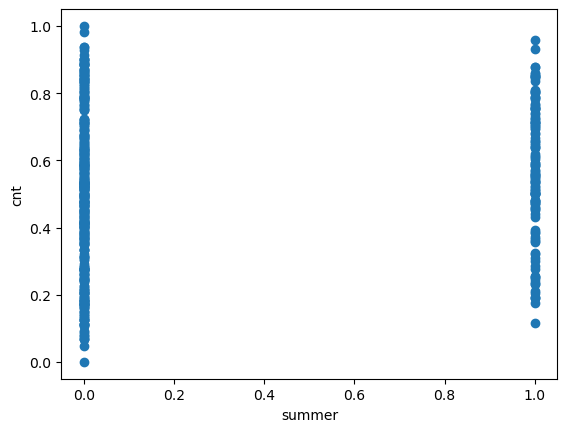

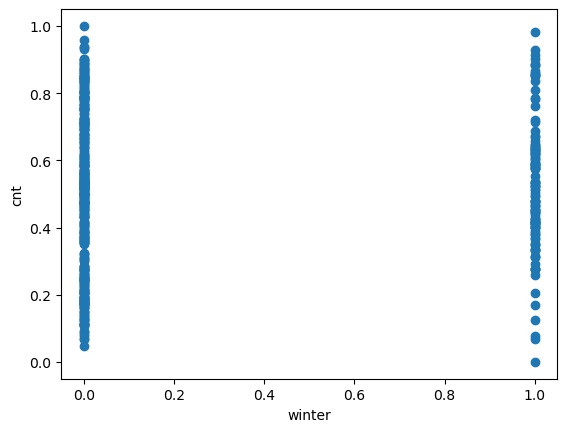

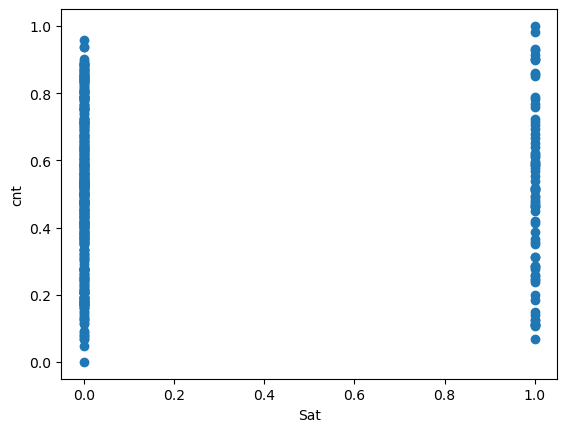

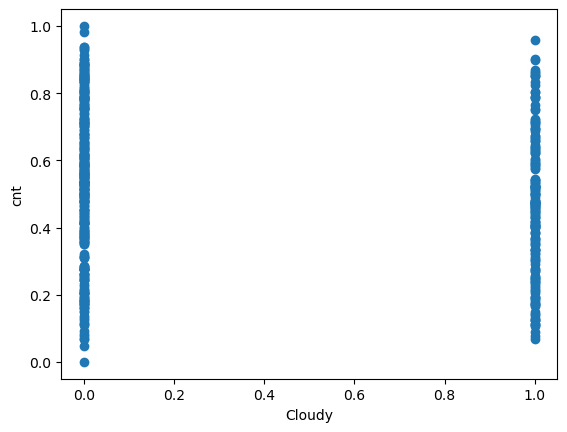

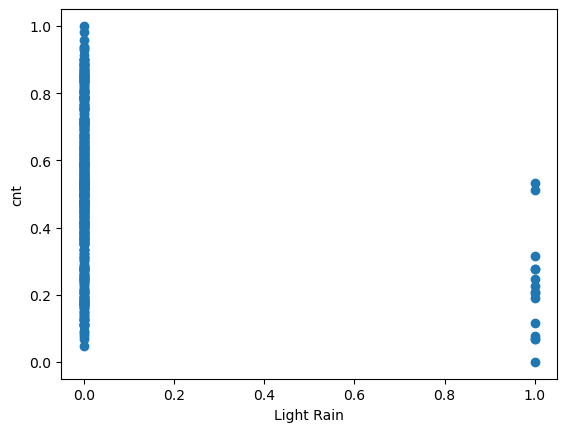

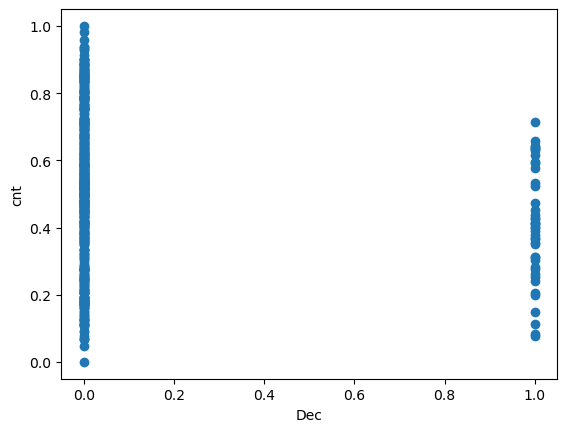

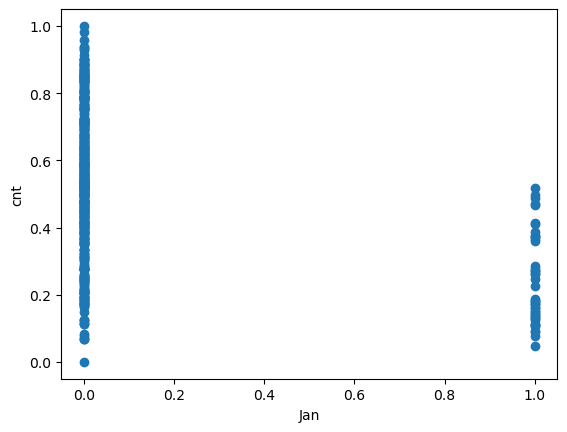

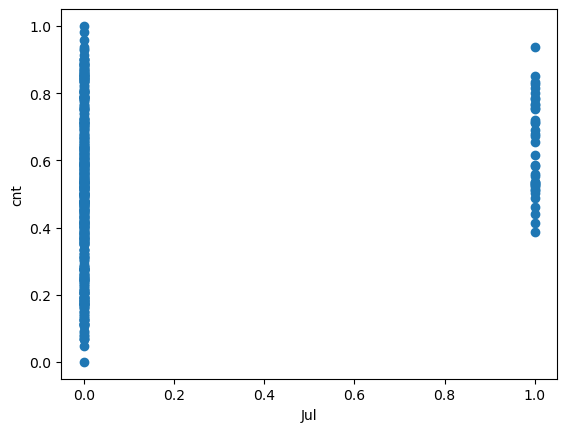

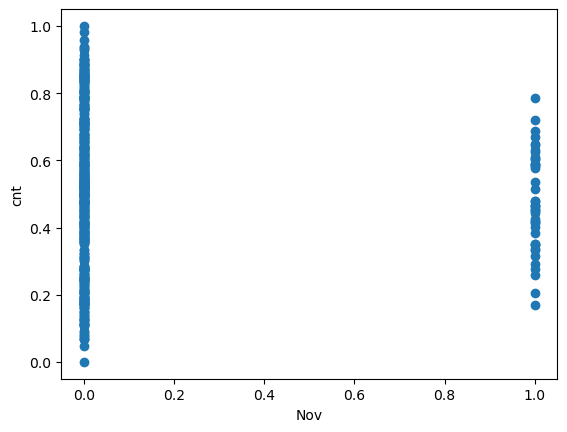

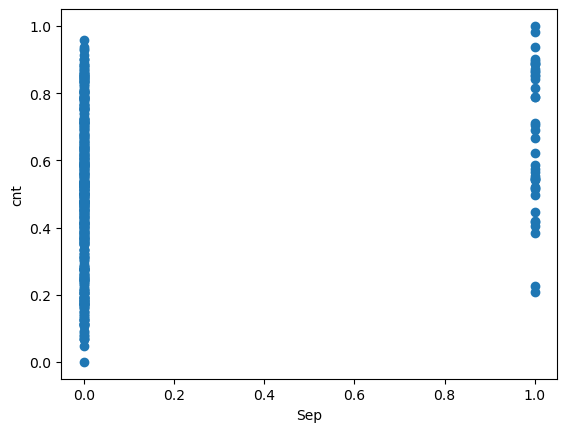

In [207]:
## Assumption 1: There is Linear relationship between the X and Y 




plt.figure(figsize=(10,35))

for i in range(len(final_columns_selected)):
    plt.scatter(X_train[final_columns_selected[i]],y_train)
    plt.xlabel(final_columns_selected[i])
    plt.ylabel('cnt')
    plt.show()

    



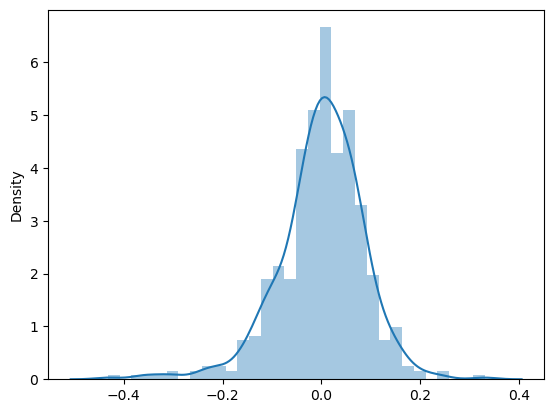

In [208]:


## Assumption 2:
    # Error term should be normally distributed(verifying it using distplot)
    
sns.distplot(error_term)
plt.show()


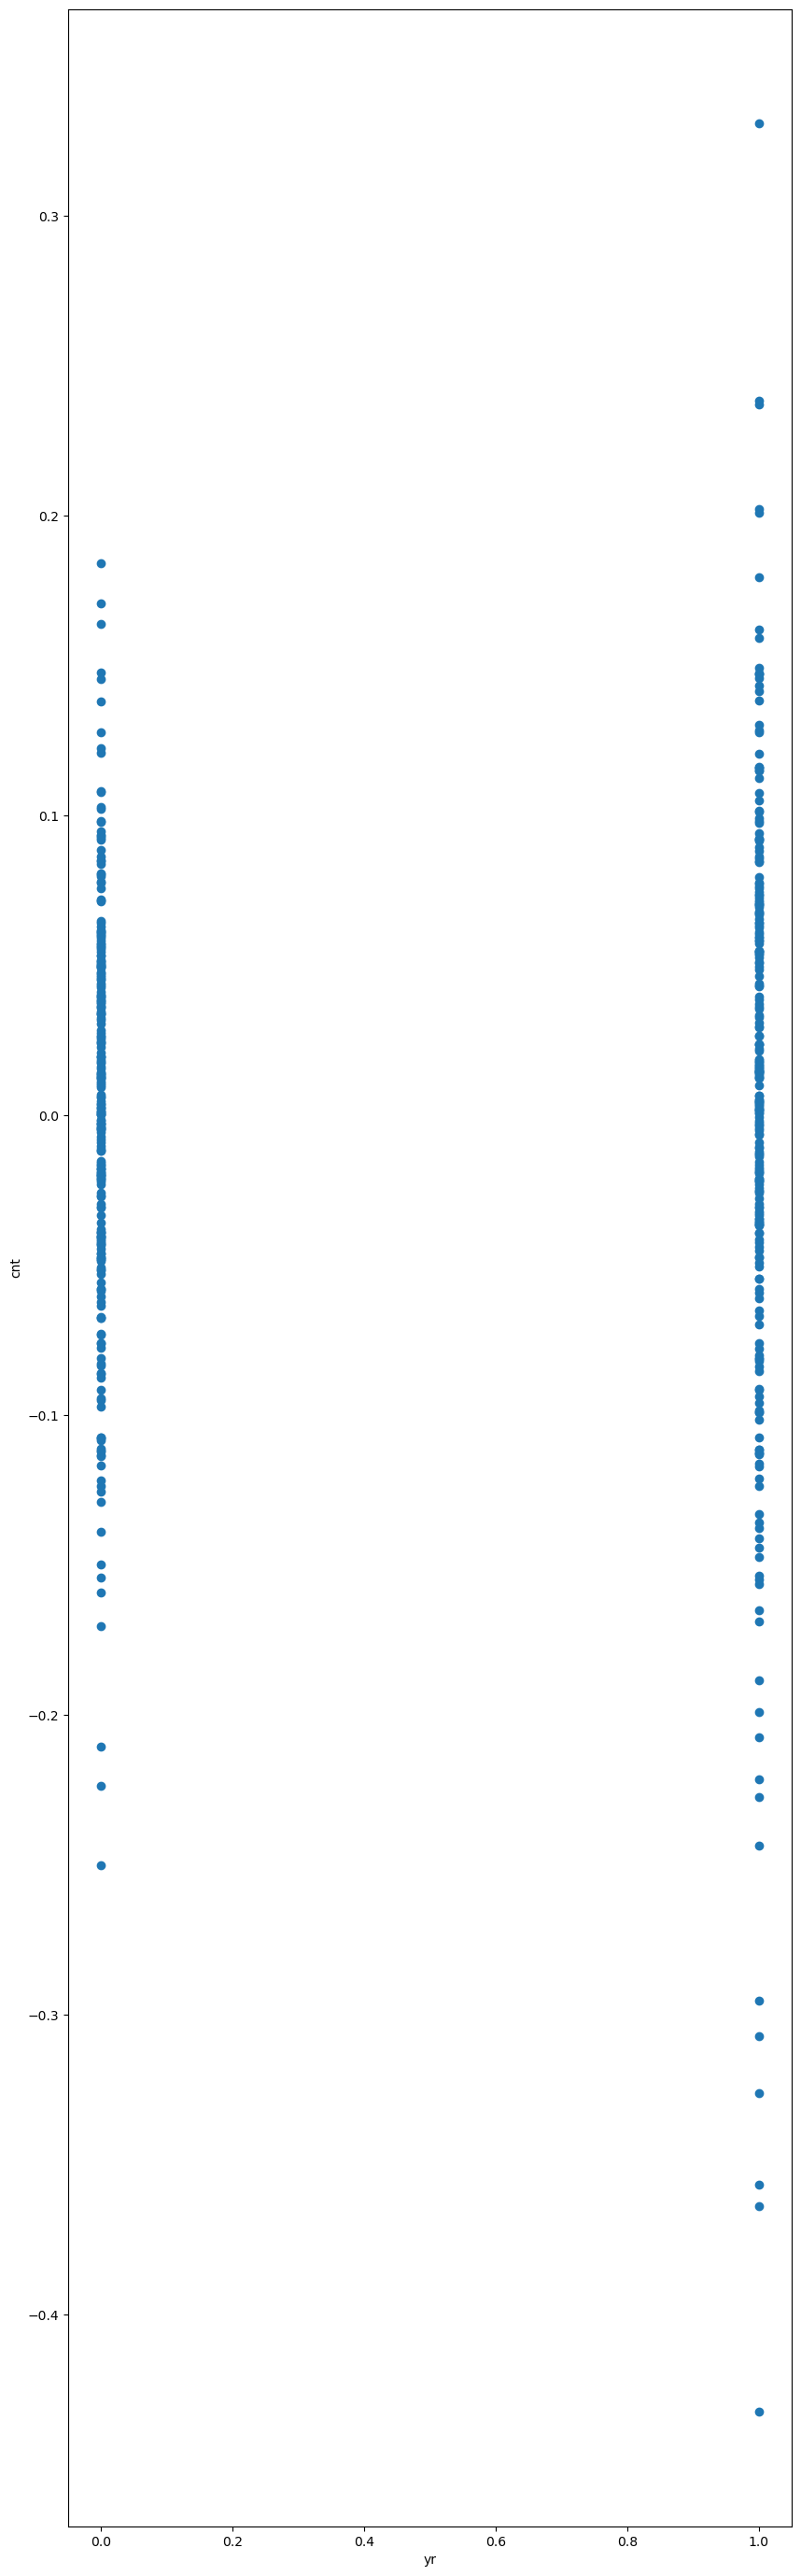

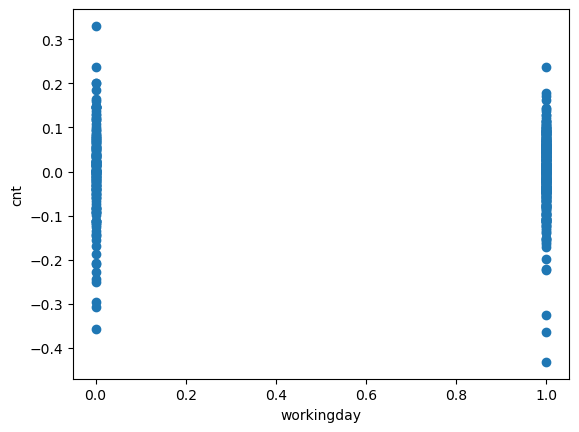

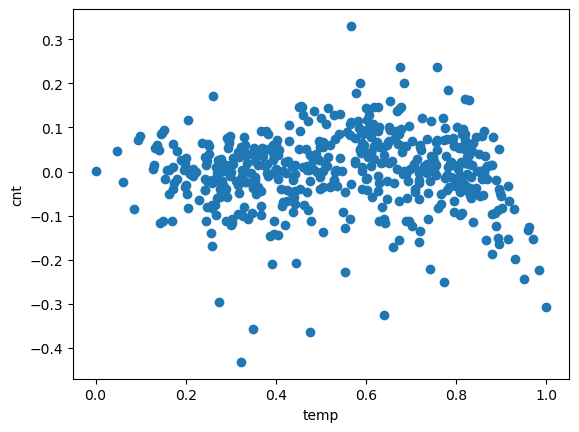

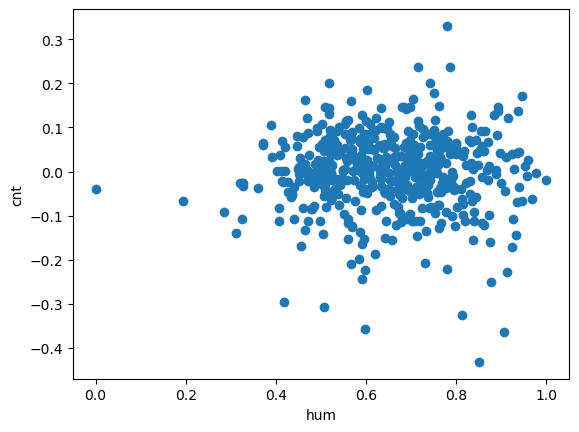

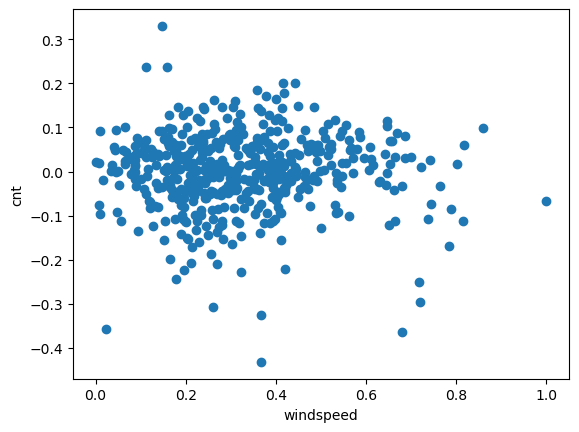

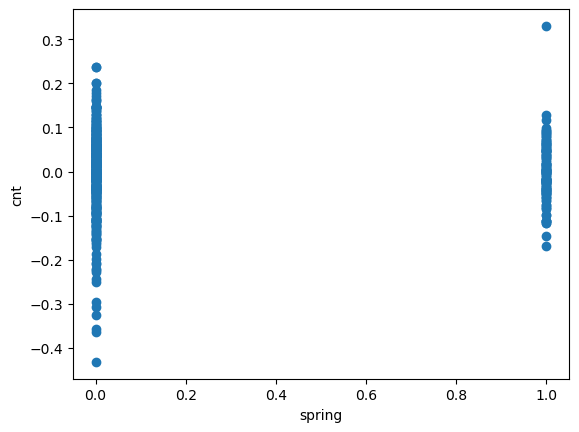

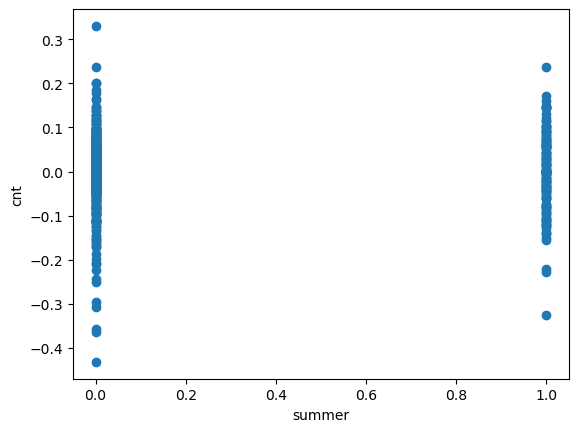

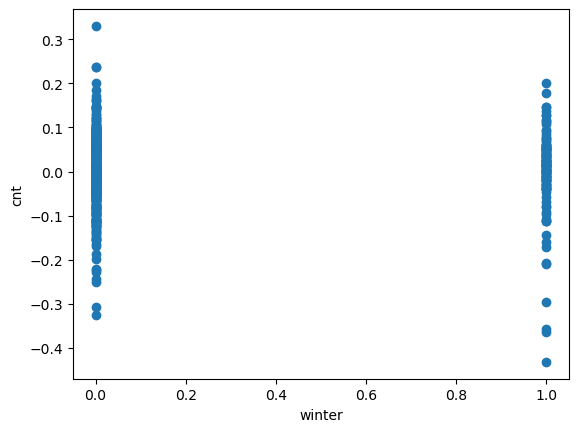

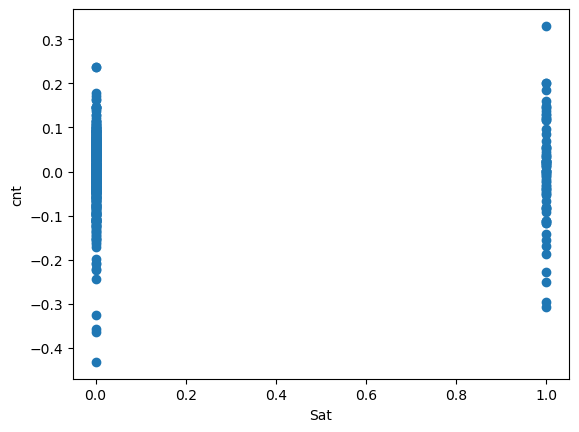

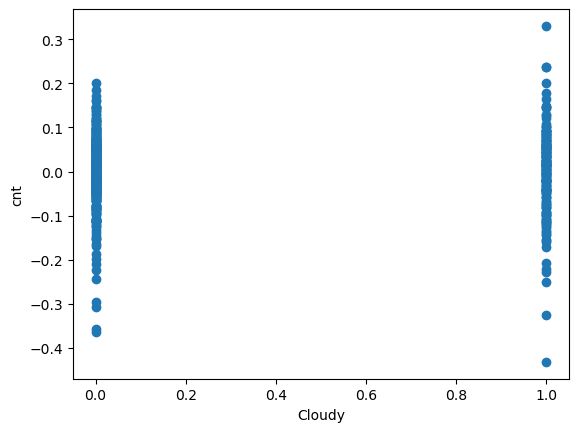

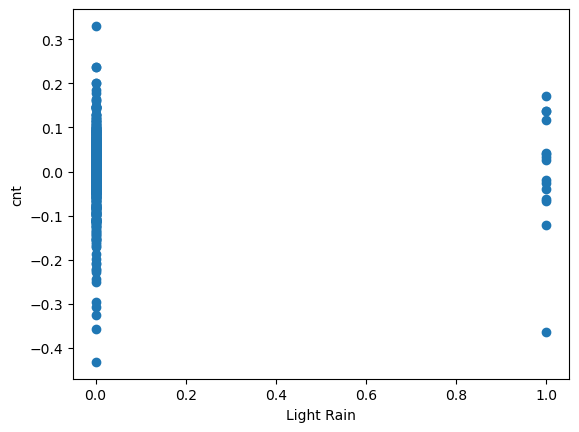

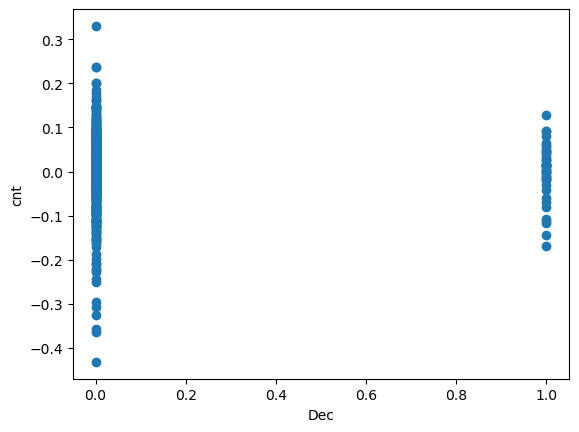

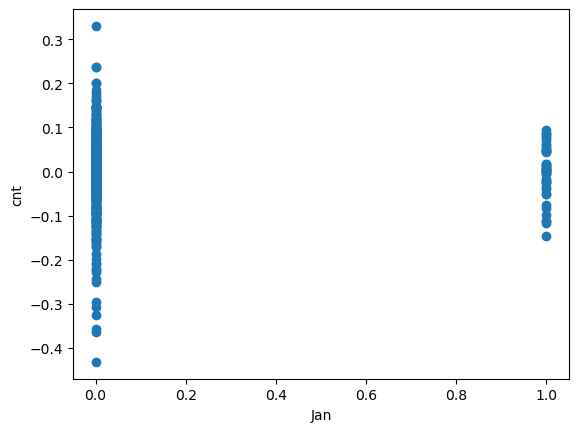

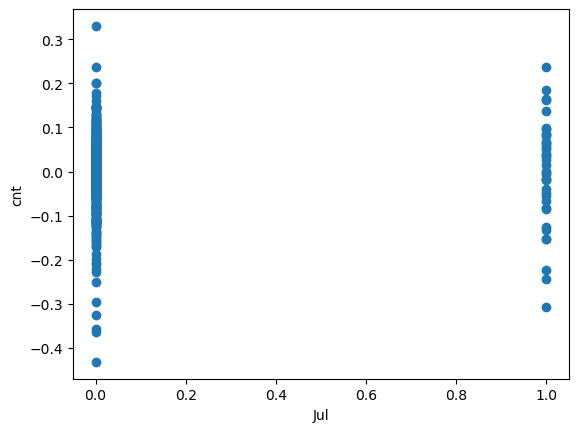

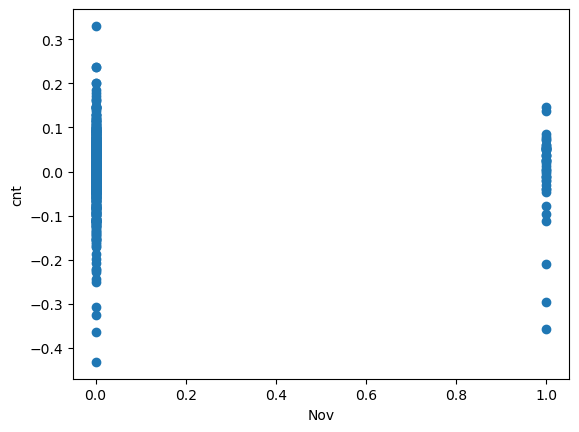

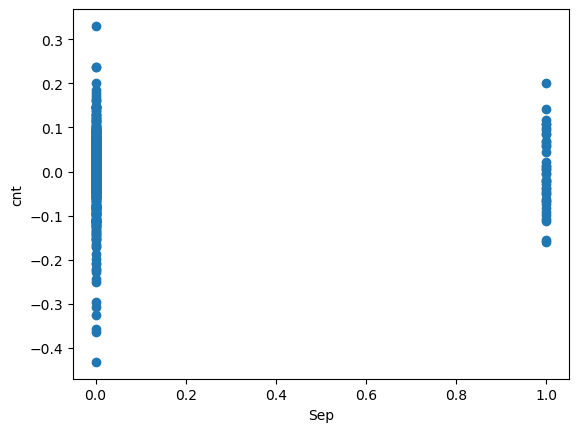

In [209]:
 
## Assumption 3: Homoscedasticity (Constant Variance of Residuals)
## Assumption 4: error terms are independent of each other
plt.figure(figsize=(10,35))

for i in range(len(final_columns_selected)):
    plt.scatter(X_train[final_columns_selected[i]],error_term)
    plt.xlabel(final_columns_selected[i])
    plt.ylabel('cnt')
    plt.show()

## Testing our model(Making prediction )

### We will use minmaxscaler for our testing data also,but we will only transform the data we wont be doing fit and transform because for the test data set we wont be knowing the min and max value

In [210]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [211]:
feature_for_scaling = ['temp','atemp','hum','windspeed','cnt']
df_test[feature_for_scaling] = scaler.transform(df_test[feature_for_scaling])
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [212]:
### Dividing test data set into X and y 
y_test = df_test.pop('cnt')
X_test = df_test

In [213]:
## keeping only those columns which are selected for our model
X_test_new = X_test[final_columns_selected]

## add constant 
X_test_new = add_constant(X_test_new)

X_test_new.head()


,const,yr,workingday,temp,hum,windspeed,spring,summer,winter,Sat,Cloudy,Light Rain,Dec,Jan,Jul,Nov,Sep
184,1.0,0,0,0.831783,0.657364,0.084219,0,0,0,0,1,0,0,0,1,0,0
535,1.0,1,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,0,0,0
299,1.0,0,1,0.511964,0.837699,0.334206,0,0,1,0,1,0,0,0,0,0,0
221,1.0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,0,0,0


In [214]:
y_test_pred = sm_lm.predict(X_test_new)
error_term=y_test - y_test_pred

In [215]:
from sklearn.metrics import r2_score
r2_score(y_pred=y_test_pred, y_true =y_test )

0.8249755910367457